In [ ]:
# Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE

In [ ]:
# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HD/Heart Disease Dataset.csv")

In [ ]:
# Check for missing values and fill them with the mean
print("Total missing values before filling:", data.isnull().sum().sum())
data.fillna(data.mean(), inplace=True)
print("Total missing values after filling:", data.isnull().sum().sum())

Total missing values before filling: 14
Total missing values after filling: 0


In [ ]:

# Convert continuous target variable into binary classes
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Prepare input and output data
X = data[['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['num']

In [ ]:
# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Apply polynomial feature expansion
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [ ]:

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_poly, y)

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Train logistic regression model
log_model = LogisticRegression(solver='liblinear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(log_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_

In [ ]:
# Evaluate the model
y_pred = model.predict(x_test)

acc_train = model.score(x_train, y_train)
print("Training Accuracy:", acc_train)

acc_test = model.score(x_test, y_test)
print("Testing Accuracy:", acc_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Training Accuracy: 0.8702290076335878
Testing Accuracy: 0.8636363636363636
Accuracy: 0.8636363636363636


In [ ]:

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.89      0.86      0.87        36

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

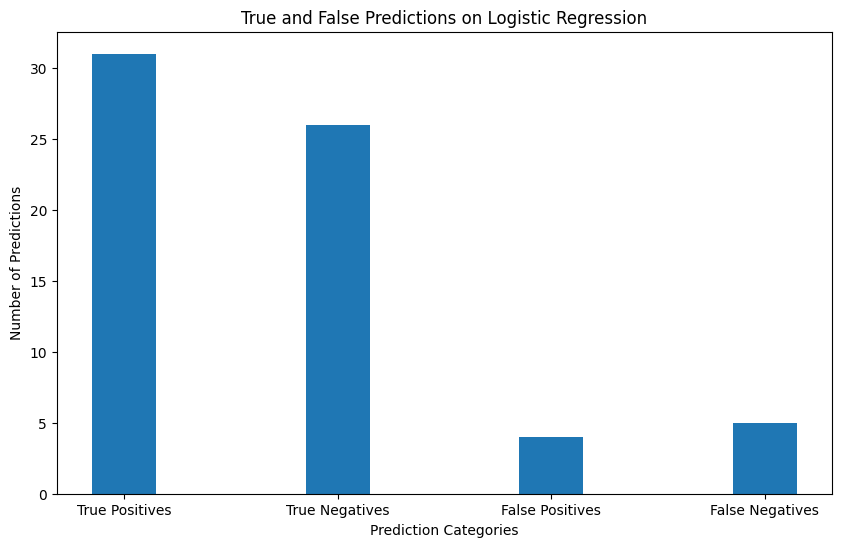

In [ ]:

# Plot the bar graph for true and false predictions
categories = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
plt.figure(figsize=(10, 6))
plt.bar(categories, [tp, tn, fp, fn], width=0.3)
plt.xlabel('Prediction Categories')
plt.ylabel('Number of Predictions')
plt.title('True and False Predictions on Logistic Regression')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')